In [2]:
from sko.ACA import ACA_TSP
import pandas as pd
import numpy as np
from scipy import spatial

In [3]:
df = pd.read_csv('./data/distances.csv')
df.head()

,Unnamed: 0,Start,Target,StartLatitude,TargetLatitude,StartLongitude,TargetLongitude,Distance
0,0,"Aberdeen, Scotland","Aberdeen, Scotland",57.15,57.150000,-2.15,-2.150000,0.000000
1,1,"Aberdeen, Scotland","Adelaide, Australia",57.15,-34.916667,-2.15,138.600000,16183.676404
2,2,"Aberdeen, Scotland","Algiers, Algeria",57.15,36.833333,-2.15,3.000000,2290.736724
3,3,"Aberdeen, Scotland","Amsterdam, Netherlands",57.15,52.366667,-2.15,4.883333,698.243287
4,4,"Aberdeen, Scotland","Ankara, Turkey",57.15,39.916667,-2.15,32.916667,3164.736857


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Start,Target,StartLatitude,TargetLatitude,StartLongitude,TargetLongitude,Distance
0,"Aberdeen, Scotland","Aberdeen, Scotland",57.15,57.150000,-2.15,-2.150000,0.000000
1,"Aberdeen, Scotland","Adelaide, Australia",57.15,-34.916667,-2.15,138.600000,16183.676404
2,"Aberdeen, Scotland","Algiers, Algeria",57.15,36.833333,-2.15,3.000000,2290.736724
3,"Aberdeen, Scotland","Amsterdam, Netherlands",57.15,52.366667,-2.15,4.883333,698.243287
4,"Aberdeen, Scotland","Ankara, Turkey",57.15,39.916667,-2.15,32.916667,3164.736857


In [4]:
cities = df['Start'].unique()
cities_index = dict(zip(cities, range(len(cities))))
df['Start'] = [cities_index[city] for city in df['Start']]
df['Target'] = [cities_index[city] for city in df['Target']]

df.head()

,Start,Target,Distance
0,0,0,0
1,0,1,16192
2,0,2,2291
3,0,3,696
4,0,4,3158


In [5]:
start = df['Start'].to_list()
new_df = pd.DataFrame(columns=set(start))

for i in start:
    rows = df.loc[df['Start'] == i]
    distances = rows['Distance'].to_list()
    new_df.loc[i] = distances
     
new_df

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0,16192,2291,696,3158,10521,2849,17748,9469,1779,...,4602,9093,2933,1639,8463,1583,8072,1575,18237,1306
1,16192,0,16045,15908,13621,13108,14301,3244,6739,16180,...,11934,7849,15036,15392,14388,15114,8708,14816,3219,15694
2,2291,16045,0,1733,2617,9376,1830,19281,9746,511,...,4322,10800,1024,1233,9520,1668,9735,2216,19150,1254
3,696,15908,1733,0,2540,10538,2165,18118,9175,1238,...,4083,9293,2260,942,9051,932,8245,1093,18565,615
4,3158,13621,2617,2540,0,11820,824,16696,7128,2587,...,1713,8765,1921,1784,11591,1610,7724,1644,16817,2119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1583,15114,1668,932,1610,10980,1287,17854,8443,1350,...,3202,9132,1719,435,9981,0,8067,554,18154,591
116,8072,8708,9735,8245,7724,17837,8460,9892,4441,9359,...,6672,1066,9514,8502,11518,8067,0,7519,10320,8525
117,1575,14816,2216,1093,1644,11475,1600,17349,8091,1864,...,3030,8583,2234,985,10036,554,7519,0,17695,1045
118,18237,3219,19150,18565,16817,10855,17521,491,9746,19400,...,15109,9272,18143,18526,11321,18154,10320,17695,0,18733


In [6]:
distance_matrix = new_df.to_numpy()
distance_matrix = distance_matrix.astype('float64')

In [7]:
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [10]:
from tqdm import tqdm

max_iter = [50, 100, 150, 500]
acas = []

for i in tqdm(max_iter):
    aca = ACA_TSP(func=cal_total_distance, n_dim=len(set(start)),
                size_pop=50, max_iter=i,
                distance_matrix=distance_matrix)
    aca.run()
    acas.append(aca)
    

100%|██████████| 3/3 [03:01<00:00, 60.64s/it]


In [11]:
import matplotlib.pyplot as plt

def plot_aca(aca):
    plt.figure(figsize=(8, 8))
    plt.plot(aca.y_best_history)
    plt.xlabel("Generation")
    plt.ylabel('Distance')
    plt.title("Distance Vs Generation")
    plt.show()

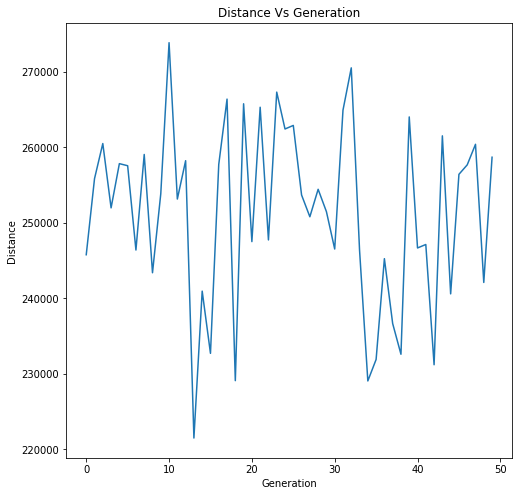

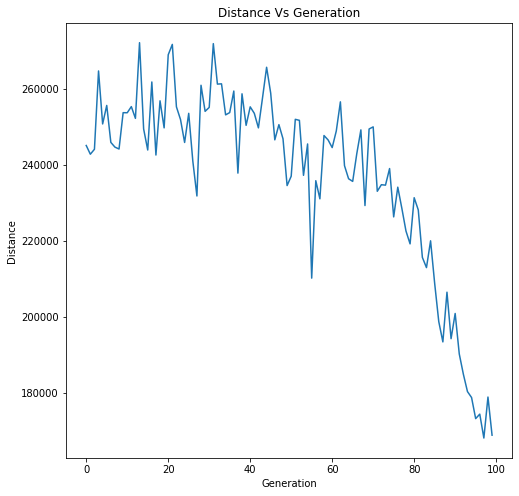

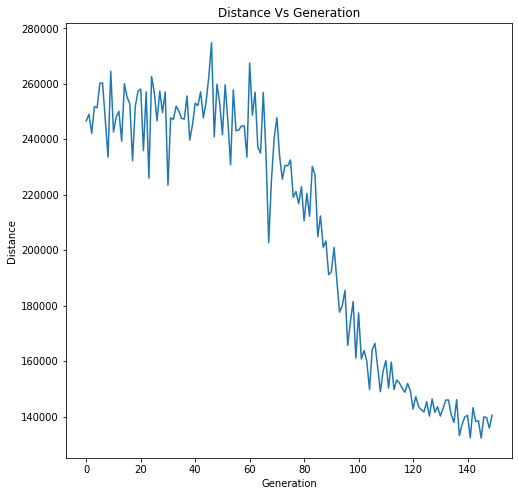

In [12]:
for aca in acas:
    plot_aca(aca)

In [48]:
for aca in acas:
    print(aca.best_y)

    

221503.0
168058.0
132254.0


In [38]:
index_cities = dict(zip(range(len(cities)), cities))
index_cities

{0: 'Aberdeen',
 1: 'Adelaide',
 2: 'Algiers',
 3: 'Amsterdam',
 4: 'Ankara',
 5: 'Asuncin',
 6: 'Athens',
 7: 'Auckland',
 8: 'Bangkok',
 9: 'Barcelona',
 10: 'Beijing',
 11: 'Belm',
 12: 'Belfast',
 13: 'Belgrade',
 14: 'Berlin',
 15: 'Birmingham',
 16: 'Bogot',
 17: 'Bombay',
 18: 'Bordeaux',
 19: 'Bremen',
 20: 'Brisbane',
 21: 'Bristol',
 22: 'Brussels',
 23: 'Bucharest',
 24: 'Budapest',
 25: 'Buenos Aires',
 26: 'Cairo',
 27: 'Calcutta',
 28: 'Canton',
 29: 'Cape Town',
 30: 'Caracas',
 31: 'Cayenne',
 32: 'Chihuahua',
 33: 'Chongqing',
 34: 'Copenhagen',
 35: 'Crdoba',
 36: 'Dakar',
 37: 'Darwin',
 38: 'Djibouti',
 39: 'Dublin',
 40: 'Durban',
 41: 'Edinburgh',
 42: 'Frankfurt',
 43: 'Georgetown',
 44: 'Glasgow',
 45: 'Guatemala City',
 46: 'Guayaquil',
 47: 'Hamburg',
 48: 'Hammerfest',
 49: 'Havana',
 50: 'Helsinki',
 51: 'Hobart',
 52: 'Hong Kong',
 53: 'Iquique',
 54: 'Irkutsk',
 55: 'Jakarta',
 56: 'Johannesburg',
 57: 'Kingston',
 58: 'Kinshasa',
 59: 'Kuala Lumpur',
 60:

In [39]:
aca = acas[0]

routine = [index_cities[i] for i in aca.x_best_history[0]]

In [45]:
df = pd.read_csv('./data/distances.csv')

city_distances_dict = dict(zip(df['Start'] + df['Target'], df['Distance']))

city_distances_dict

{'AberdeenAberdeen': 0,
 'AberdeenAdelaide': 16192,
 'AberdeenAlgiers': 2291,
 'AberdeenAmsterdam': 696,
 'AberdeenAnkara': 3158,
 'AberdeenAsuncin': 10521,
 'AberdeenAthens': 2849,
 'AberdeenAuckland': 17748,
 'AberdeenBangkok': 9469,
 'AberdeenBarcelona': 1779,
 'AberdeenBeijing': 7796,
 'AberdeenBelm': 7709,
 'AberdeenBelfast': 367,
 'AberdeenBelgrade': 2076,
 'AberdeenBerlin': 1119,
 'AberdeenBirmingham': 526,
 'AberdeenBogot': 8511,
 'AberdeenBombay': 7339,
 'AberdeenBordeaux': 1374,
 'AberdeenBremen': 829,
 'AberdeenBrisbane': 16186,
 'AberdeenBristol': 632,
 'AberdeenBrussels': 817,
 'AberdeenBucharest': 2411,
 'AberdeenBudapest': 1785,
 'AberdeenBuenos Aires': 11476,
 'AberdeenCairo': 3969,
 'AberdeenCalcutta': 7948,
 'AberdeenCanton': 9267,
 'AberdeenCape Town': 10308,
 'AberdeenCaracas': 7530,
 'AberdeenCayenne': 7267,
 'AberdeenChihuahua': 8148,
 'AberdeenChongqing': 8292,
 'AberdeenCopenhagen': 918,
 'AberdeenCrdoba': 11430,
 'AberdeenDakar': 4897,
 'AberdeenDarwin': 13661,

In [42]:
def all_cities_visited_simulation(cities, cities_dict):
    total_distance = 0
    start = None
    target = None
    
    for city in cities:
        if not (start):
            start = city
            continue
     
        target = city
        total_distance += cities_dict[start + target]
        start = target
        target = None
    return total_distance

In [43]:
all_cities_visited_simulation(routine, city_distances_dict)

237702